In [374]:
import pandas as pd
import matplotlib.pyplot as plt

**Dataset overview**

In [375]:
data1 = pd.read_csv('E:\Szkolenia Data Scientist\COVID data project\country_vaccinations.csv')

In [376]:
data1.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [377]:
data1["country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Faeroe Isl

In [378]:
len(data1)

86512

**Countries statistics**

In [379]:
#Creating a list of all columns names
columns = []
for i in range(0,len(data1.columns),1):
    columns.append(data1.columns[i])
columns

['country',
 'iso_code',
 'date',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'daily_vaccinations_raw',
 'daily_vaccinations',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'people_fully_vaccinated_per_hundred',
 'daily_vaccinations_per_million',
 'vaccines',
 'source_name',
 'source_website']

In [380]:
#Creating a list with all countries' names
country_name = []
country_name = data1['country'].unique()

In [381]:
#Creating a DataFrame with most significant data
data_summary = pd.DataFrame({'Country':[],'Total Vaccinations':[],'People Fully Vaccinated':[],'People Vaccinated':[]})
data_summary

,Country,Total Vaccinations,People Fully Vaccinated,People Vaccinated


In [382]:
for country in country_name:
    data_summary = data_summary.append({'Country': country,
                                        'Total Vaccinations': data1[(data1["country"]==country)]["total_vaccinations"].max(),
                                        'People Fully Vaccinated': data1[(data1["country"]==country)]["people_fully_vaccinated"].max(),
                                        'People Vaccinated': data1[(data1["country"]==country)]["people_vaccinated"].max()
                                       }, ignore_index=True)
data_summary.head()

,Country,Total Vaccinations,People Fully Vaccinated,People Vaccinated
0,Afghanistan,5751015.0,4420127.0,5082824.0
1,Albania,2754244.0,1215199.0,1278902.0
2,Algeria,13704895.0,6110712.0,7461932.0
3,Andorra,151997.0,53367.0,57817.0
4,Angola,17535411.0,5993792.0,11235059.0


In [383]:
data_summary["People NOT Fully Vaccinated"]=data_summary["People Vaccinated"]-data_summary["People Fully Vaccinated"]
data_summary.head()

,Country,Total Vaccinations,People Fully Vaccinated,People Vaccinated,People NOT Fully Vaccinated
0,Afghanistan,5751015.0,4420127.0,5082824.0,662697.0
1,Albania,2754244.0,1215199.0,1278902.0,63703.0
2,Algeria,13704895.0,6110712.0,7461932.0,1351220.0
3,Andorra,151997.0,53367.0,57817.0,4450.0
4,Angola,17535411.0,5993792.0,11235059.0,5241267.0


In [384]:
#Checkout
data_summary[data_summary["Country"]=="Poland"]

,Country,Total Vaccinations,People Fully Vaccinated,People Vaccinated,People NOT Fully Vaccinated
159,Poland,53908363.0,22343826.0,22585418.0,241592.0


**Global statistics**

In [385]:
#Checking the oldest and the lates date in my dataset
print(data1['date'].min())
print(data1['date'].max())

2020-12-02
2022-03-29


In [386]:
# The list of all unique dates in my dataset
dates = []
dates = data1['date'].unique()
dates = sorted(dates)

In [387]:
#Creating a DataFrame with most significant data
data_date_summary = pd.DataFrame({'date':[],'daily_vaccinations':[],'total_vaccinations':[], 'my_total_vaccinations':[]})
data_date_summary

,date,daily_vaccinations,total_vaccinations,my_total_vaccinations


In [388]:
Vaccinations_sum = 0
for date in dates:
    Vaccinations_sum = Vaccinations_sum + data1[(data1['date']==date)]['daily_vaccinations'].sum()   
    print(Vaccinations_sum)
    print(data1[(data1['date']==date)]['daily_vaccinations'].sum())
    print(data1[(data1['date']==date)]['total_vaccinations'].sum())
    data_date_summary = data_date_summary.append({'date': date,
                                        'daily_vaccinations': data1[(data1["date"]==date)]["daily_vaccinations"].sum(),
                                        'total_vaccinations': data1[(data1["date"]==date)]["total_vaccinations"].sum(),
                                        'my_total_vaccinations': Vaccinations_sum}, ignore_index=True)
# data_date_summary.head()

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
1.0
1.0
6.0
2.0
1.0
9.0
3.0
1.0
7.0
5.0
2.0
13.0
7.0
2.0
11.0
9.0
2.0
30299.0
4590.0
4581.0
34883.0
32488.0
27898.0
1613882.0
296277.0
263789.0
247600.0
611280.0
315003.0
524477.0
985619.0
374339.0
944905.0
1359813.0
374194.0
1127928.0
1730340.0
370527.0
1241530.0
2164355.0
434015.0
1656295.0
2665444.0
501089.0
2206452.0
3246868.0
581424.0
2840542.0
3846243.0
599375.0
3134931.0
4397291.0
551048.0
3191364.0
4948022.0
550731.0
3370595.0
5520340.0
572318.0
3638784.0
6178451.0
658111.0
4420488.0
6940291.0
761840.0
5432888.0
7804802.0
864511.0
6623268.0
8707900.0
903098.0
11783102.0
9659629.0
951729.0
7459525.0
10681550.0
1021921.0
8757527.0
11749650.0
1068100.0
8368577.0
12910151.0
1160501.0
9486839.0
14201445.0
1291294.0
11645739.0
15556121.0
1354676.0
13069395.0
17126453.0
1570332.0
14880839.0
18913224.0
1786771.0
16744874.0
20767159.0
1853935.0
26521799.0
22608708.0
1841549.0
23224605.0
24818482.0
2209774.0
25480672

41901674.0
4084779340.0
4434989084.0
41305516.0
4127893467.0
4475701045.0
40711961.0
4267760169.0
4515542602.0
39841557.0
4442221730.0
4554416014.0
38873412.0
4474695899.0
4592110519.0
37694505.0
4517186392.0
4629741468.0
37630949.0
4014980724.0
4667397731.0
37656263.0
4365521239.0
4705010145.0
37612414.0
4344944492.0
4741779348.0
36769203.0
4133153859.0
4778411542.0
36632194.0
4678115903.0
4814953708.0
36542166.0
4713423160.0
4851559764.0
36606056.0
4787646742.0
4887772294.0
36212530.0
4721673895.0
4923367094.0
35594800.0
4631927758.0
4958660037.0
35292943.0
4666082292.0
4994461826.0
35801789.0
4860113824.0
5030405996.0
35944170.0
4740906362.0
5066554259.0
36148263.0
4970746158.0
5103320977.0
36766718.0
4804078773.0
5140866066.0
37545089.0
4951956496.0
5180119037.0
39252971.0
4802547134.0
5220603052.0
40484015.0
4833700363.0
5261728396.0
41125344.0
5212025118.0
5303029859.0
41301463.0
5102168405.0
5343899702.0
40869843.0
5223859268.0
5385080752.0
41181050.0
5215800723.0
5425117509.0
4

13899113.0
9524501613.0
11210973133.0
13363033.0
9562206855.0
11224405060.0
13431927.0
9681894550.0
11237557303.0
13152243.0
9698693633.0
11250607272.0
13049969.0
9286618602.0
11263786543.0
13179271.0
8803268800.0
11277459266.0
13672723.0
8785869328.0
11291223269.0
13764003.0
9136042424.0
11305609311.0
14386042.0
8982039938.0
11320239871.0
14630560.0
8343523059.0


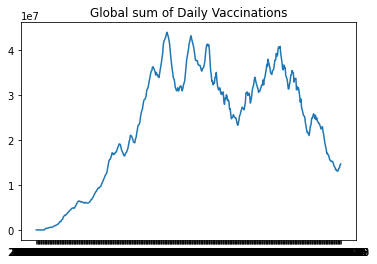

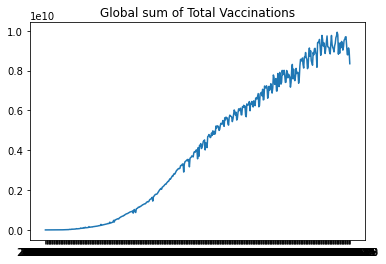

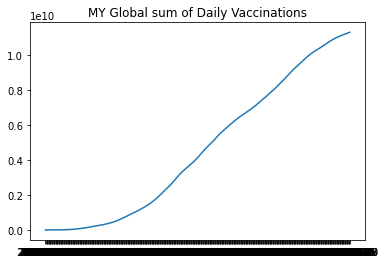

In [389]:
plt.figure(1)
plt.plot(data_date_summary['date'],data_date_summary['daily_vaccinations'])
plt.title("Global sum of Daily Vaccinations")
plt.figure(2)
plt.plot(data_date_summary['date'],data_date_summary['total_vaccinations'])
plt.title("Global sum of Total Vaccinations")
plt.figure(3)
plt.plot(data_date_summary['date'],data_date_summary['my_total_vaccinations'])
plt.title("MY Global sum of Daily Vaccinations")
plt.show()

In [392]:
data_date_summary.last

<bound method NDFrame.last of            date  daily_vaccinations  total_vaccinations  my_total_vaccinations
0    2020-12-02                 0.0        0.000000e+00           0.000000e+00
1    2020-12-03                 0.0        0.000000e+00           0.000000e+00
2    2020-12-04                 0.0        1.000000e+00           0.000000e+00
3    2020-12-05                 0.0        0.000000e+00           0.000000e+00
4    2020-12-06                 0.0        0.000000e+00           0.000000e+00
..          ...                 ...                 ...                    ...
478  2022-03-25          13179271.0        8.803269e+09           1.126379e+10
479  2022-03-26          13672723.0        8.785869e+09           1.127746e+10
480  2022-03-27          13764003.0        9.136042e+09           1.129122e+10
481  2022-03-28          14386042.0        8.982040e+09           1.130561e+10
482  2022-03-29          14630560.0        8.343523e+09           1.132024e+10

[483 rows x 4 columns

In [395]:
data_summary.to_excel('E:\Szkolenia Data Scientist\COVID data project\country_summary.xlsx')
data_date_summary.to_excel('E:\Szkolenia Data Scientist\COVID data project\date_summary.xlsx')